In [1]:
import numpy as np
import laspy
import pdal
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import pandas as pd

In [2]:
pth = "C:/Users/hejtm/Downloads/2021-04-28_17-48-15_100pct_time.laz"
pth = "C:/Users/hejtm/Downloads/plochaBK_sample49m.las"

In [ ]:
# This takes ages!!! need to do it consecutively
# las = laspy.read(pth)

## Checking the dimensions
# list(las.point_format.dimension_names)


In [3]:
## PDAL
pipeline="""{
  "pipeline": [
    {
        "type": "readers.las",
        "filename": "C:/Users/hejtm/Downloads/2021-04-28_17-48-15_100pct_time.laz",
        "count":1000000
    },
    {
        "type": "filters.sort",
        "dimension": "Z"
    }
  ]
}"""

r = pdal.Pipeline(pipeline)
r.validate()
r.execute()

1000000

In [4]:
df = pd.DataFrame(r.arrays[0])
df.describe()

,X,Y,Z,Intensity,ReturnNumber,NumberOfReturns,ScanDirectionFlag,EdgeOfFlightLine,Classification,ScanAngleRank,UserData,PointSourceId,Red,Green,Blue
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.000000,1000000.0,1000000.0
mean,-0.204394,6.550730,4.684414,4064.530558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.000001,0.0,0.0
std,12.988480,15.673743,7.186818,3149.800869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001000,0.0,0.0
min,-97.696100,-83.799500,-3.173800,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.000000,0.0,0.0
25%,-2.932000,-0.788100,-0.597900,1542.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.000000,0.0,0.0
50%,0.028400,2.512900,0.611850,3598.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.000000,0.0,0.0
75%,3.514100,13.893825,8.316825,5911.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.000000,0.0,0.0
max,98.734400,98.053700,75.261500,65535.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.000000,0.0,0.0


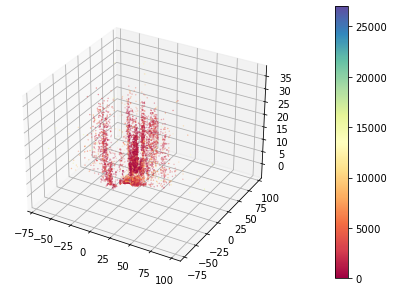

In [5]:
##
df_plt = df.sample(n=10000)
fig = plt.figure(figsize=[20, 5])
ax = plt.axes(projection='3d')
sc = ax.scatter(df_plt['X'], df_plt['Y'], df_plt['Z'],
                c=df_plt['Intensity'], s=0.1, marker='o', cmap="Spectral")
plt.colorbar(sc)
plt.show()

## Searching for ground

In [6]:
pipeline_search_ground="""{
"pipeline": [
    {
        "type": "readers.las",
        "filename": "C:/Users/hejtm/Downloads/2021-04-28_17-48-15_100pct_time.laz",
        "count":1000000
    },
    {
        "type":"filters.assign",
        "assignment":"Classification[:]=0"
    },
    {
        "type":"filters.elm"
    },
    {
      "type":"filters.outlier"
    },
    {
      "type":"filters.smrf",
      "ignore":"Classification[7:7]",
      "slope":0.2,
      "window":16,
      "threshold":0.45,
      "scalar":1.2
    },
    {
      "type":"filters.range",
      "limits":"Classification[2:2]"
    },
    {
        "type":"writers.las",
        "filename":"output-ground.las"
    }
]
}"""

pipe_ground = pdal.Pipeline(pipeline_search_ground)
pipe_ground.validate()
pipe_ground.execute()

479667

In [7]:
df_ground = pd.DataFrame(pipe_ground.arrays[0])
df_ground.describe()

,X,Y,Z,Intensity,ReturnNumber,NumberOfReturns,ScanDirectionFlag,EdgeOfFlightLine,Classification,ScanAngleRank,UserData,PointSourceId,Red,Green,Blue
count,479667.000000,479667.000000,479667.000000,479667.000000,479667.0,479667.0,479667.0,479667.0,479667.0,479667.0,479667.0,479667.0,479667.000000,479667.0,479667.0
mean,-0.298675,2.472372,-0.496174,5213.384790,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,254.000002,0.0,0.0
std,6.937817,8.128889,0.974509,2536.267188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001444,0.0,0.0
min,-69.333600,-61.393600,-2.969100,0.000000,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,254.000000,0.0,0.0
25%,-1.887400,-0.261800,-0.657500,3598.000000,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,254.000000,0.0,0.0
50%,-0.139000,1.379400,-0.600100,5140.000000,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,254.000000,0.0,0.0
75%,1.625000,3.331800,-0.536600,6682.000000,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,254.000000,0.0,0.0
max,82.053900,94.628900,26.776600,65535.000000,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,255.000000,0.0,0.0


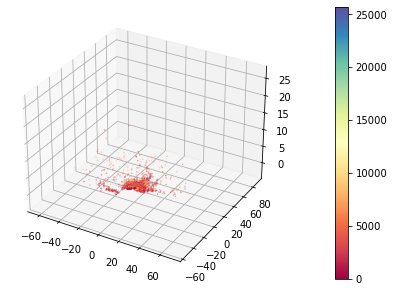

In [8]:
df_plt = df_ground.sample(10000)
fig = plt.figure(figsize=[20, 5])
ax = plt.axes(projection='3d')
sc = ax.scatter(df_plt['X'], df_plt['Y'], df_plt['Z'],
                c=df_plt['Intensity'], s=0.1, marker='o', cmap="Spectral")
plt.colorbar(sc)
plt.show()